# Import libraries

In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Get city bbox

In [3]:
place_name = "Altstadt, Dresden, Germany"

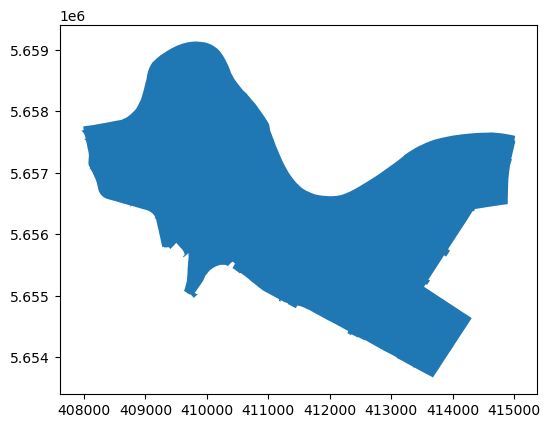

In [4]:
city = ox.geocode_to_gdf(place_name)
ax = ox.projection.project_gdf(city).plot()

In [5]:
# minx, miny, maxx, maxy (left, bottom, right, top)
city.total_bounds

array([13.6864402, 51.0280799, 13.7872926, 51.0766681])

In [6]:
city_bbox = [13.6864402, 51.0280799, 13.7872926, 51.0766681]

# Get green space area from OSM

## 1. Use landuse key

In [7]:
green_landuse_area = ox.features_from_bbox(city_bbox, 
                                           tags={'landuse': ['allotments',
                                                             'farmland',
                                                             'forest',
                                                             'grass',
                                                             'greenfield',
                                                             'meadow',
                                                             'orchard',
                                                             'recreation_ground',
                                                             'village_green',
                                                             'vineyard']})

<Axes: >

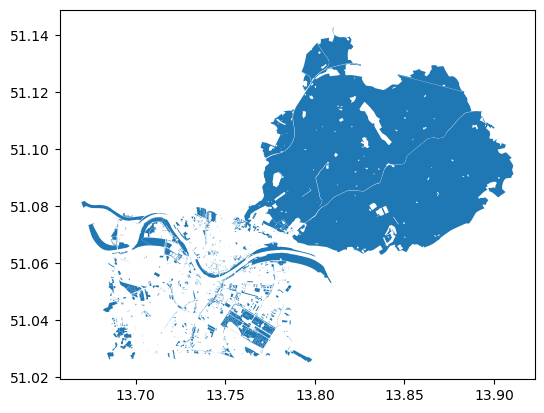

In [8]:
green_landuse_area.plot()

In [12]:
green_landuse_area = green_landuse_area.reset_index()

In [17]:
green_landuse_area.head()

element      id                                           geometry  \
0  relation    6128  MULTIPOLYGON (((13.89557 51.10721, 13.89696 51...   
1  relation  157942  POLYGON ((13.76618 51.04139, 13.76469 51.03996...   
2  relation  157943  POLYGON ((13.76701 51.04119, 13.76706 51.04117...   
3  relation  157944  POLYGON ((13.7594 51.03423, 13.7598 51.03418, ...   
4  relation  396375  POLYGON ((13.76482 51.03744, 13.76481 51.03743...   

  landuse            name area:highway old_name source addr:city addr:country  \
0  forest  Dresdner Heide          NaN      NaN    NaN       NaN          NaN   
1  forest             NaN          NaN      NaN    NaN       NaN          NaN   
2  forest             NaN          NaN      NaN    NaN       NaN          NaN   
3  forest             NaN          NaN      NaN    NaN       NaN          NaN   
4   grass             NaN          NaN      NaN    NaN       NaN          NaN   

   ... protect_class protection_title  ref short_protection_title crop fixme  \
0  ...           NaN              NaN  NaN                    NaN  NaN   NaN   
1  ...           NaN              NaN  NaN                    NaN  NaN   NaN   
2  ...           NaN              NaN  NaN                    NaN  NaN   NaN   
3  ...           NaN              NaN  NaN                    NaN  NaN   NaN   
4  ...           NaN              NaN  NaN                    NaN  NaN   NaN   

  level          type           name:hsb layer  
0   NaN  multipolygon  Drježdźanska hola   NaN  
1   NaN  multipolygon                NaN   NaN  
2   NaN  multipolygon                NaN   NaN  
3   NaN  multipolygon                NaN   NaN  
4   NaN  multipolygon                NaN   NaN  

[5 rows x 71 columns]

In [43]:
green_landuse_area.to_file("../data/raw/osm/green space/green_landuse_area.geojson", driver='GeoJSON')

In [15]:
# print(green_landuse_area[green_landuse_area['landuse']=='allotments'].iloc[0].values)

In [16]:
# green_landuse_area[~(green_landuse_area['barrier'].isna())]

In [11]:
# green_landuse_area[~(green_landuse_area['access'].isna())]['access']

element  id        
way      24730633          yes
         151517678     private
         261286854     private
         380992567     private
         383559126     private
         544368822     private
         544368823     private
         544368824     private
         544368825     private
         544391219     private
         671541679     private
         1287114603    private
Name: access, dtype: object

## 2. Use leisure key

In [21]:
green_leisure_area = ox.features_from_bbox(city_bbox, 
                                           tags={'leisure': ['garden',
                                                             'golf_course',
                                                             'nature_reserve',
                                                             'park',
                                                             'pitch',
                                                             'playground']})

<Axes: >

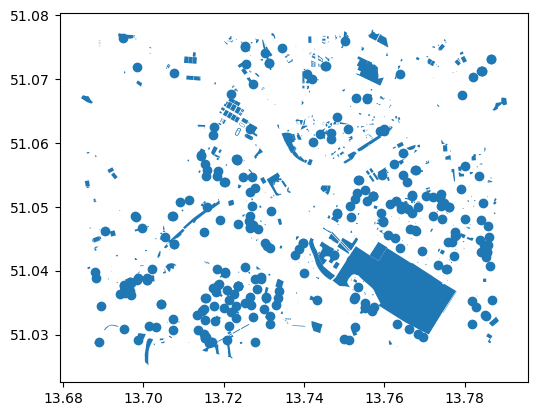

In [22]:
green_leisure_area.plot()

In [24]:
green_leisure_area = green_leisure_area.reset_index()

In [25]:
green_leisure_area.head()

element         id                   geometry   access     leisure  \
0    node  266593887   POINT (13.71519 51.0301)      yes  playground   
1    node  274970363  POINT (13.71997 51.03423)  private  playground   
2    node  280462694  POINT (13.76765 51.04634)      yes  playground   
3    node  289488035  POINT (13.75018 51.07594)      yes  playground   
4    node  313713718   POINT (13.75921 51.0491)      NaN       pitch   

                        name      opening_hours                  operator  \
0   Würzburger Straße - Park  Mo-Su 08:00-22:00  Landeshauptstadt Dresden   
1                        NaN                NaN                   Vonovia   
2                        NaN                NaN                       NaN   
3  Spielplatz Schanzenstraße                NaN                       NaN   
4                        NaN                NaN                       NaN   

  wheelchair         sport  ... garden:style name:de material pitch:net  \
0        NaN           NaN  ...          NaN     NaN      NaN       NaN   
1        yes           NaN  ...          NaN     NaN      NaN       NaN   
2        NaN           NaN  ...          NaN     NaN      NaN       NaN   
3        yes  table_tennis  ...          NaN     NaN      NaN       NaN   
4        NaN  table_tennis  ...          NaN     NaN      NaN       NaN   

  pitch:net:material pitch:net:overhang operator:short type contact:facebook  \
0                NaN                NaN            NaN  NaN              NaN   
1                NaN                NaN            NaN  NaN              NaN   
2                NaN                NaN            NaN  NaN              NaN   
3                NaN                NaN            NaN  NaN              NaN   
4                NaN                NaN            NaN  NaN              NaN   

  name:fr  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 91 columns]

In [44]:
green_leisure_area.to_file("../data/raw/osm/green space/green_leisure_area.geojson", driver='GeoJSON')

In [26]:
# tiles = "cartodbdarkmatter"
# green_leisure_area.explore(tiles=tiles, color="lime", tooltip="name")

In [27]:
# green_leisure_area[green_leisure_area['leisure']=='garden'].count()

In [28]:
# green_leisure_area[~(green_leisure_area['access'].isna())]['access'].unique()

## 3. Use natural key

In [30]:
green_natural_area = ox.features_from_bbox(city_bbox, 
                                           tags={'natural': ['wood',
                                                             'scrub',
                                                             'heath',
                                                             'grassland',
                                                             'wetland']})

<Axes: >

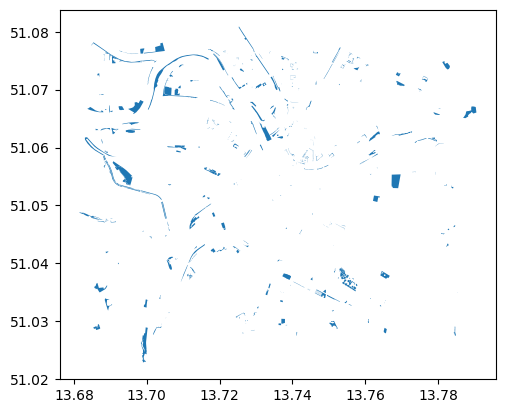

In [31]:
green_natural_area.plot()

In [33]:
green_natural_area = green_natural_area.reset_index()

In [34]:
green_natural_area.head()

element        id                                           geometry  \
0  relation    416763  POLYGON ((13.75248 51.03744, 13.75261 51.03758...   
1  relation   3169464  POLYGON ((13.74307 51.05855, 13.74299 51.05847...   
2  relation   5515461  POLYGON ((13.73346 51.03539, 13.7334 51.03524,...   
3  relation   7267976  POLYGON ((13.75354 51.03727, 13.75348 51.03731...   
4  relation  10735164  POLYGON ((13.76676 51.03784, 13.76637 51.03745...   

     natural attraction       name  name:cs species:de species:wikidata  \
0  grassland     animal  Mandrills  Mandril   Mandrill          Q189868   
1      scrub        NaN        NaN      NaN        NaN              NaN   
2  grassland        NaN        NaN      NaN        NaN              NaN   
3  grassland        NaN        NaN      NaN        NaN              NaN   
4       wood        NaN        NaN      NaN        NaN              NaN   

  wheelchair  ... level man_made description:de image landcover comment  \
0        NaN  ...   NaN      NaN            NaN   NaN       NaN     NaN   
1        NaN  ...   NaN      NaN            NaN   NaN       NaN     NaN   
2        NaN  ...   NaN      NaN            NaN   NaN       NaN     NaN   
3        NaN  ...   NaN      NaN            NaN   NaN       NaN     NaN   
4        NaN  ...   NaN      NaN            NaN   NaN       NaN     NaN   

  access  fee species:wikipedia          type  
0    NaN  NaN               NaN  multipolygon  
1    NaN  NaN               NaN  multipolygon  
2    NaN  NaN               NaN  multipolygon  
3    NaN  NaN               NaN  multipolygon  
4    NaN  NaN               NaN  multipolygon  

[5 rows x 32 columns]

In [45]:
green_natural_area.to_file("../data/raw/osm/green space/green_natural_area.geojson", driver='GeoJSON')

## 4. Use tourism key

In [36]:
green_campsite_area = ox.features_from_bbox(city_bbox, 
                                            tags={'tourism': ['camp_site',
                                                              'picnic_site']})

<Axes: >

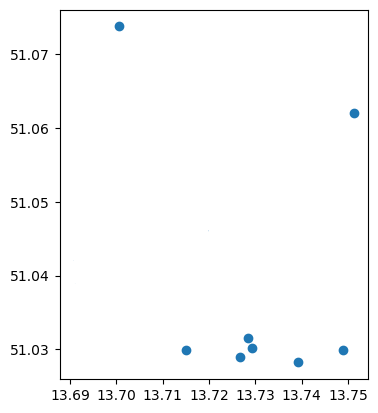

In [37]:
green_campsite_area.plot()

In [39]:
green_campsite_area = green_campsite_area.reset_index()

In [40]:
green_campsite_area.head()

element          id                   geometry      tourism shelter seats  \
0    node  3128780402  POINT (13.74884 51.02996)  picnic_site     NaN   NaN   
1    node  3163118403   POINT (13.7284 51.03152)  picnic_site      no   NaN   
2    node  3806645587  POINT (13.72925 51.03019)  picnic_site      no   NaN   
3    node  4352882229  POINT (13.71503 51.02999)  picnic_site     NaN   NaN   
4    node  4888415416  POINT (13.72658 51.02899)  picnic_site     NaN    20   

  covered access addr:city addr:housenumber addr:postcode addr:street  
0     NaN    NaN       NaN              NaN           NaN         NaN  
1     NaN    NaN       NaN              NaN           NaN         NaN  
2     NaN    NaN       NaN              NaN           NaN         NaN  
3     NaN    NaN       NaN              NaN           NaN         NaN  
4     NaN    NaN       NaN              NaN           NaN         NaN

In [46]:
green_campsite_area.to_file("../data/raw/osm/green space/green_campsite_area.geojson", driver='GeoJSON')

# Get POI from OSM

## 1. Use amenity key

In [47]:
poi_amenity_gdf = ox.features_from_bbox(city_bbox, 
                                        tags={'amenity': ['bench',
                                                          'waste_basket']})

<Axes: >

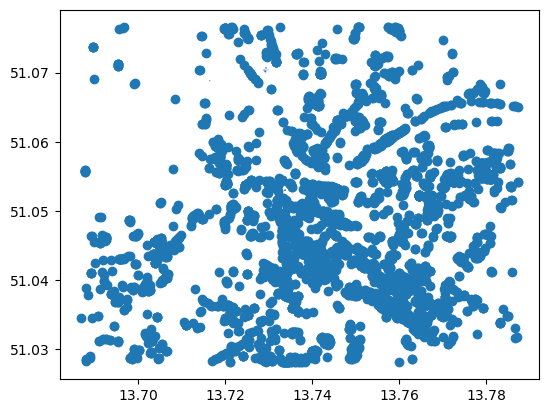

In [48]:
poi_amenity_gdf.plot()

In [49]:
poi_amenity_gdf = poi_amenity_gdf.reset_index()

In [50]:
poi_amenity_gdf.head()

element         id                   geometry       amenity backrest  \
0    node  255925960  POINT (13.70218 51.03911)  waste_basket      NaN   
1    node  266687099  POINT (13.70123 51.03841)         bench      yes   
2    node  304869266  POINT (13.74573 51.05307)         bench      yes   
3    node  304869267  POINT (13.74575 51.05313)         bench      yes   
4    node  304869268  POINT (13.74573 51.05319)         bench      yes   

   check_date material covered colour seats  ... wikidata  lit bench:type  \
0         NaN      NaN     NaN    NaN   NaN  ...      NaN  NaN        NaN   
1         NaN      NaN     NaN    NaN   NaN  ...      NaN  NaN        NaN   
2  2021-08-13      NaN     NaN    NaN   NaN  ...      NaN  NaN        NaN   
3  2021-08-13      NaN     NaN    NaN   NaN  ...      NaN  NaN        NaN   
4  2021-08-13      NaN     NaN    NaN   NaN  ...      NaN  NaN        NaN   

  vending access operator deposit_ring leisure barrier man_made  
0     NaN    NaN      NaN          NaN     NaN     NaN      NaN  
1     NaN    NaN      NaN          NaN     NaN     NaN      NaN  
2     NaN    NaN      NaN          NaN     NaN     NaN      NaN  
3     NaN    NaN      NaN          NaN     NaN     NaN      NaN  
4     NaN    NaN      NaN          NaN     NaN     NaN      NaN  

[5 rows x 49 columns]

In [51]:
poi_amenity_gdf.to_file("../data/raw/osm/amenity/poi_amenity.geojson", driver='GeoJSON')

## 2. Use leisure key

In [52]:
poi_leisure_gdf = ox.features_from_bbox(city_bbox, 
                                        tags={'leisure': ['picnic_table',
                                                          'playground']})

<Axes: >

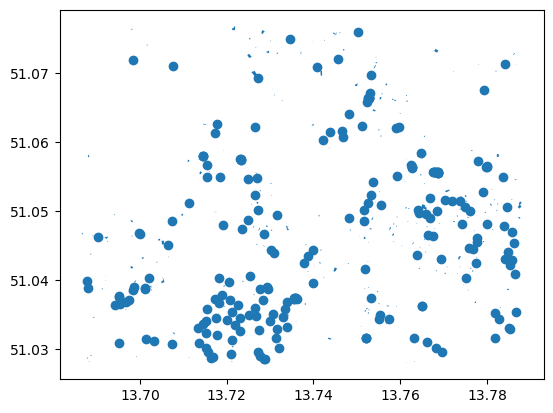

In [53]:
poi_leisure_gdf.plot()

In [56]:
poi_leisure_gdf = poi_leisure_gdf.reset_index()

In [57]:
poi_leisure_gdf.head()

element         id                   geometry     access     leisure  \
0    node  266593887   POINT (13.71519 51.0301)        yes  playground   
1    node  274970363  POINT (13.71997 51.03423)    private  playground   
2    node  280462694  POINT (13.76765 51.04634)        yes  playground   
3    node  289488035  POINT (13.75018 51.07594)        yes  playground   
4    node  372545516  POINT (13.78181 51.03163)  customers  playground   

                        name      opening_hours                  operator  \
0   Würzburger Straße - Park  Mo-Su 08:00-22:00  Landeshauptstadt Dresden   
1                        NaN                NaN                   Vonovia   
2                        NaN                NaN                       NaN   
3  Spielplatz Schanzenstraße                NaN                       NaN   
4                        NaN                NaN                       NaN   

  wheelchair         sport  ... image capacity fence_type fixme addr:country  \
0        NaN           NaN  ...   NaN      NaN        NaN   NaN          NaN   
1        yes           NaN  ...   NaN      NaN        NaN   NaN          NaN   
2        NaN           NaN  ...   NaN      NaN        NaN   NaN          NaN   
3        yes  table_tennis  ...   NaN      NaN        NaN   NaN          NaN   
4        NaN           NaN  ...   NaN      NaN        NaN   NaN          NaN   

  contact:email contact:mobile contact:website level type  
0           NaN            NaN             NaN   NaN  NaN  
1           NaN            NaN             NaN   NaN  NaN  
2           NaN            NaN             NaN   NaN  NaN  
3           NaN            NaN             NaN   NaN  NaN  
4           NaN            NaN             NaN   NaN  NaN  

[5 rows x 53 columns]

In [58]:
poi_leisure_gdf.to_file("../data/raw/osm/amenity/poi_leisure.geojson", driver='GeoJSON')

In [55]:
# poi_leisure_gdf.loc[poi_leisure_gdf.geometry.geometry.type=='Point']

# Get road network, cycleway, and footpath

## 1. Get road network

In [64]:
# road_network_gdf = ox.features_from_bbox(city_bbox, 
#                                          tags={'highway': ['primary',
#                                                            'secondary',
#                                                            'tertiary',
#                                                            'residential']})

In [65]:
# road_network_gdf.plot()

In [66]:
# road_network_gdf = road_network_gdf.reset_index()

In [67]:
# road_network_gdf.head()

In [68]:
# road_network_gdf.to_file("../data/raw/osm/network/road_network.geojson", driver='GeoJSON')

In [69]:
road_network = ox.graph_from_bbox(city_bbox, network_type='drive')

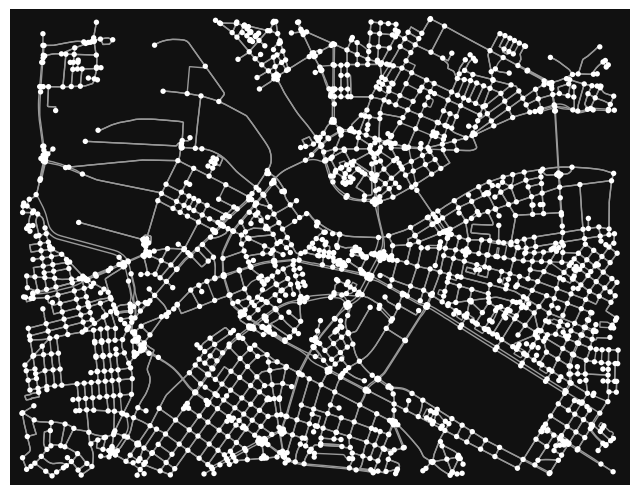

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [70]:
ox.plot_graph(road_network)

In [71]:
nodes, edges = ox.graph_to_gdfs(road_network)

In [72]:
m = edges.explore(color="skyblue", tiles="cartodbdarkmatter")
nodes.explore(m=m, color="pink", marker_kwds={"radius": 6})

In [73]:
nodes = nodes.reset_index()
edges = edges.reset_index()

In [74]:
edges.head()

u         v  key                                              osmid  \
0  534608  30436919    0                                          762891172   
1  534622    534608    0                  [762904347, 250470755, 762904351]   
2  534624    534622    0  [762876705, 762876706, 31822598, 762904349, 76...   
3  534625  30436908    0                                          152651376   
4  534625    534624    0                              [30559972, 309474893]   

     highway   lanes maxspeed                                    name  oneway  \
0   tertiary       4       50                         Ackermannstraße   False   
1  secondary  [2, 3]       50                          Zellescher Weg    True   
2  secondary  [2, 3]       50                          Zellescher Weg    True   
3    primary       4       50                    Fritz-Foerster-Platz    True   
4  secondary       2       50  [Zellescher Weg, Fritz-Foerster-Platz]    True   

  reversed      length    ref  \
0    False   12.554889    NaN   
1    False  204.274998  S 172   
2    False  814.363141  S 172   
3    False   17.695123  B 170   
4    False   56.362990  S 172   

                                            geometry access width junction  \
0  LINESTRING (13.74584 51.02841, 13.74591 51.02852)    NaN   NaN      NaN   
1  LINESTRING (13.74296 51.02871, 13.74322 51.028...    NaN   NaN      NaN   
2  LINESTRING (13.73151 51.02975, 13.73168 51.029...    NaN   NaN      NaN   
3  LINESTRING (13.73085 51.03005, 13.73083 51.03021)    NaN   NaN      NaN   
4  LINESTRING (13.73085 51.03005, 13.73106 51.029...    NaN   NaN      NaN   

  bridge tunnel est_width  
0    NaN    NaN       NaN  
1    NaN    NaN       NaN  
2    NaN    NaN       NaN  
3    NaN    NaN       NaN  
4    NaN    NaN       NaN

In [75]:
nodes.head()

osmid          y          x  street_count highway railway junction  ref  \
0  534608  51.028413  13.745844             4     NaN     NaN      NaN  NaN   
1  534622  51.028714  13.742964             3     NaN     NaN      NaN  NaN   
2  534624  51.029753  13.731508             3     NaN     NaN      NaN  NaN   
3  534625  51.030047  13.730852             4     NaN     NaN      NaN  NaN   
4  534626  51.029457  13.730978             3     NaN     NaN      NaN  NaN   

                    geometry  
0  POINT (13.74584 51.02841)  
1  POINT (13.74296 51.02871)  
2  POINT (13.73151 51.02975)  
3  POINT (13.73085 51.03005)  
4  POINT (13.73098 51.02946)

In [77]:
nodes.to_file("../data/raw/osm/network/road network/road_network_nodes.geojson", driver='GeoJSON')
edges.to_file("../data/raw/osm/network/road network/road_network_edges.geojson", driver='GeoJSON')

In [78]:
# nodes['junction'].unique()

## 2. Get cycleway

In [79]:
cycle_network = ox.graph_from_bbox(city_bbox, network_type='bike')

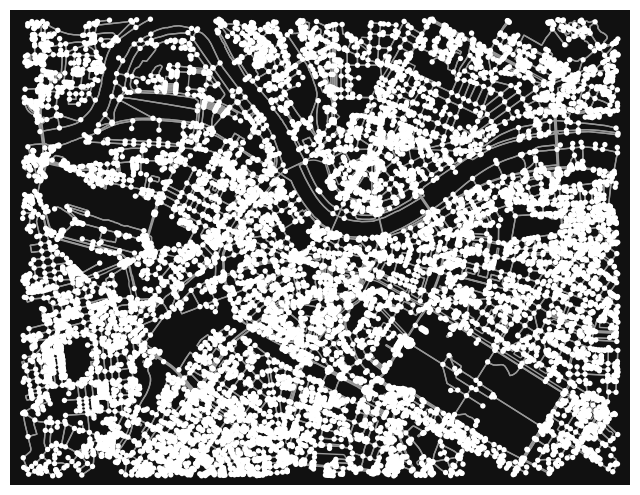

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [80]:
ox.plot_graph(cycle_network)

In [81]:
cycle_nodes, cycle_edges = ox.graph_to_gdfs(cycle_network)

In [82]:
cycle_nodes = cycle_nodes.reset_index()
cycle_edges = cycle_edges.reset_index()

In [83]:
cycle_nodes.head()

osmid          y          x  street_count highway railway junction  ref  \
0  534608  51.028413  13.745844             5     NaN     NaN      NaN  NaN   
1  534622  51.028714  13.742964             3     NaN     NaN      NaN  NaN   
2  534624  51.029753  13.731508             3     NaN     NaN      NaN  NaN   
3  534625  51.030047  13.730852             4     NaN     NaN      NaN  NaN   
4  534626  51.029457  13.730978             3     NaN     NaN      NaN  NaN   

                    geometry  
0  POINT (13.74584 51.02841)  
1  POINT (13.74296 51.02871)  
2  POINT (13.73151 51.02975)  
3  POINT (13.73085 51.03005)  
4  POINT (13.73098 51.02946)

In [84]:
cycle_edges.head()

u           v  key                   osmid       highway   lanes  \
0  534608    30436919    0               762891172      tertiary       4   
1  534608   371857221    0               496200351     secondary       2   
2  534608   365507697    0               762891171  unclassified       1   
3  534622  5642109774    0                     110   residential     NaN   
4  534622  7128758478    0  [250470755, 762904351]     secondary  [2, 3]   

  maxspeed                   name  oneway reversed  ...    ref  \
0       50        Ackermannstraße   False    False  ...    NaN   
1       50         Zellescher Weg    True    False  ...  S 172   
2       50         Paradiesstraße    True    False  ...    NaN   
3       50  Heinrich-Greif-Straße   False    False  ...    NaN   
4       50         Zellescher Weg    True    False  ...  S 172   

                                            geometry access width junction  \
0  LINESTRING (13.74584 51.02841, 13.74591 51.02852)    NaN   NaN      NaN   
1  LINESTRING (13.74584 51.02841, 13.74587 51.028...    NaN   NaN      NaN   
2  LINESTRING (13.74584 51.02841, 13.74581 51.028...    NaN   NaN      NaN   
3  LINESTRING (13.74296 51.02871, 13.74295 51.028...    NaN   NaN      NaN   
4  LINESTRING (13.74296 51.02871, 13.74322 51.028...    NaN   NaN      NaN   

  bridge service tunnel est_width area  
0    NaN     NaN    NaN       NaN  NaN  
1    NaN     NaN    NaN       NaN  NaN  
2    NaN     NaN    NaN       NaN  NaN  
3    NaN     NaN    NaN       NaN  NaN  
4    NaN     NaN    NaN       NaN  NaN  

[5 rows x 21 columns]

In [85]:
cycle_nodes.to_file("../data/raw/osm/network/cycle network/cycle_network_nodes.geojson", driver='GeoJSON')
cycle_edges.to_file("../data/raw/osm/network/cycle network/cycle_network_edges.geojson", driver='GeoJSON')

## 3. Get footpath

In [86]:
footpath_network = ox.graph_from_bbox(city_bbox, network_type='walk')

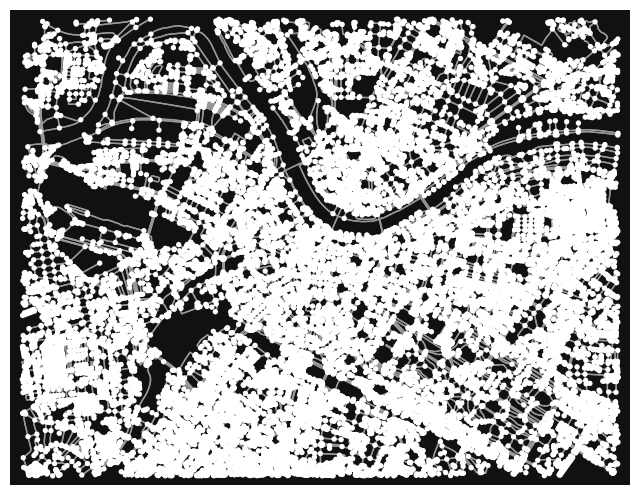

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [87]:
ox.plot_graph(footpath_network)

In [88]:
footpath_nodes, footpath_edges = ox.graph_to_gdfs(footpath_network)

In [89]:
footpath_nodes = footpath_nodes.reset_index()
footpath_edges = footpath_edges.reset_index()

In [90]:
footpath_nodes.head()

osmid          y          x  street_count highway junction  ref railway  \
0  534608  51.028413  13.745844             5     NaN      NaN  NaN     NaN   
1  534622  51.028714  13.742964             3     NaN      NaN  NaN     NaN   
2  534624  51.029753  13.731508             3     NaN      NaN  NaN     NaN   
3  534626  51.029457  13.730978             3     NaN      NaN  NaN     NaN   
4  534628  51.032891  13.730335             3     NaN      NaN  NaN     NaN   

                    geometry  
0  POINT (13.74584 51.02841)  
1  POINT (13.74296 51.02871)  
2  POINT (13.73151 51.02975)  
3  POINT (13.73098 51.02946)  
4  POINT (13.73034 51.03289)

In [91]:
footpath_edges.head()

u          v  key      osmid       highway lanes maxspeed  \
0  534608   30436919    0  762891172      tertiary     4       50   
1  534608  371857221    0  496200351     secondary     2       50   
2  534608  367835353    0  762891166  unclassified     2       50   
3  534608  365507697    0  762891171  unclassified     1       50   
4  534608  371857211    0  762904347     secondary     3       50   

              name  oneway reversed  ...    ref  \
0  Ackermannstraße   False    False  ...    NaN   
1   Zellescher Weg   False    False  ...  S 172   
2   Paradiesstraße   False     True  ...    NaN   
3   Paradiesstraße   False    False  ...    NaN   
4   Zellescher Weg   False     True  ...  S 172   

                                            geometry access bridge width  \
0  LINESTRING (13.74584 51.02841, 13.74591 51.02852)    NaN    NaN   NaN   
1  LINESTRING (13.74584 51.02841, 13.74587 51.028...    NaN    NaN   NaN   
2  LINESTRING (13.74584 51.02841, 13.74585 51.028...    NaN    NaN   NaN   
3  LINESTRING (13.74584 51.02841, 13.74581 51.028...    NaN    NaN   NaN   
4  LINESTRING (13.74584 51.02841, 13.74582 51.028...    NaN    NaN   NaN   

  junction service tunnel est_width area  
0      NaN     NaN    NaN       NaN  NaN  
1      NaN     NaN    NaN       NaN  NaN  
2      NaN     NaN    NaN       NaN  NaN  
3      NaN     NaN    NaN       NaN  NaN  
4      NaN     NaN    NaN       NaN  NaN  

[5 rows x 21 columns]

In [92]:
footpath_nodes.to_file("../data/raw/osm/network/footpath network/footpath_network_nodes.geojson", driver='GeoJSON')
footpath_edges.to_file("../data/raw/osm/network/footpath network/footpath_network_edges.geojson", driver='GeoJSON')

# Test getting path density/path length of each polygon

In [93]:
green_landuse_area_utm = green_landuse_area.to_crs(32632)

In [94]:
green_landuse_area_utm['total_area'] = green_landuse_area_utm.area

In [95]:
green_landuse_area_utm['geometry'].count()

np.int64(2352)

In [96]:
green_landuse_area_utm[green_landuse_area_utm['total_area'] > 100]['geometry'].count()

np.int64(1713)

In [97]:
green_landuse_area_utm_filter = green_landuse_area_utm[green_landuse_area_utm['total_area'] > 100]

MultiPolygon


/root/miniforge3/envs/pugs-detection/lib/python3.13/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


{'n': 1802, 'm': 5382, 'k_avg': 5.973362930077691, 'edge_length_total': 659381.3667537847, 'edge_length_avg': 122.51604733440816, 'streets_per_node_avg': 3.1126526082130965, 'streets_per_node_counts': {0: 0, 1: 158, 2: 0, 3: 1167, 4: 441, 5: 30, 6: 6}, 'streets_per_node_proportions': {0: 0.0, 1: 0.0876803551609323, 2: 0.0, 3: 0.6476137624861266, 4: 0.24472807991120976, 5: 0.016648168701442843, 6: 0.003329633740288568}, 'intersection_count': 1644, 'street_length_total': 329690.6833768931, 'street_segment_count': 2691, 'street_length_avg': 122.51604733440844, 'circuity_avg': 1.041312118103419, 'self_loop_proportion': 0.0007432181345224824}


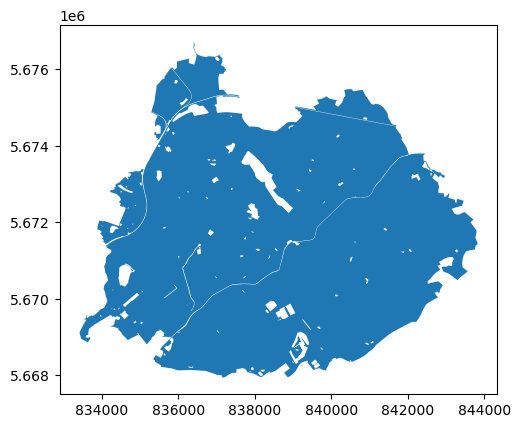

In [99]:
for index, row in green_landuse_area_utm_filter.iterrows():
    print(row['geometry'].geom_type)
    if 'Polygon' in row['geometry'].geom_type:
        green_landuse_area_utm_filter[green_landuse_area_utm_filter['geometry'] == row['geometry']].plot()
        latlng_geom, _ = ox.projection.project_geometry(row['geometry'], crs={'init':'epsg:32632'}, to_latlong=True)
        temp_graph = ox.graph_from_polygon(latlng_geom, network_type='walk')
        stats = ox.basic_stats(temp_graph)
        print(stats)
        break